# Python, Spark and R in one Notebook 

From the instructions of [all-spark-notebook](https://github.com/jupyter/docker-stacks/tree/master/all-spark-notebook) and [Stackoverflow](https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook).


In [1]:
import datetime
print('Last run:', datetime.datetime.utcnow(), 'UTC')  # timezone can't be detected from browser

Last run: 2018-05-14 14:42:03.949438 UTC


In [2]:
import pyspark
sc = pyspark.SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

## Variable transfer from a python to the R

In [3]:
# in python
rdd = sc.parallelize(range(1000))
sample = rdd.takeSample(False, 10)
sample

[270, 276, 250, 172, 798, 896, 225, 446, 636, 297]

In [4]:
%%sh
conda install rpy2

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda:
#
rpy2                      2.9.3              py36r3.4.1_0    conda-forge


In [5]:
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': sample
})

In [6]:
%load_ext rpy2.ipython


In [7]:
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

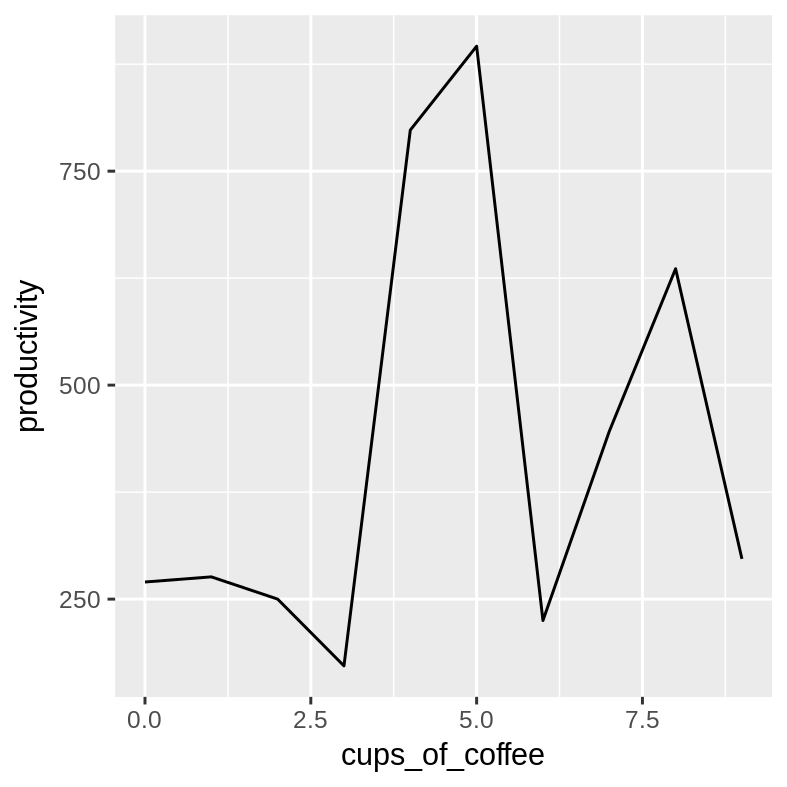

In [8]:
%%R -i df -w 10 -h 10 --units cm -r 200
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

## R Spark kernel

In [10]:
%%R -w 5 -h 5 --units cm -r 200
library(SparkR)

as <- sparkR.session("local[*]")

# do something to prove it works
df <- as.DataFrame(iris)
head(filter(df, df$Petal_Width > 0.2))

  Sepal_Length Sepal_Width Petal_Length Petal_Width Species
1          5.4         3.9          1.7         0.4  setosa
2          4.6         3.4          1.4         0.3  setosa
3          5.7         4.4          1.5         0.4  setosa
4          5.4         3.9          1.3         0.4  setosa
5          5.1         3.5          1.4         0.3  setosa
6          5.7         3.8          1.7         0.3  setosa
